# Trasformazioni di variabili

Se da una variabile casuale $x$ otteniamo un'altra variabile $y=f(x)$, la distribuzione di probabilità di $y$ potrà essere determinata dalla distribuzione di probabiltià di $x$.

Il caso discreto è concettualmente più semplice, anche se spesso computazionalmente più laborioso, perché richiede spesso applicazione del calcolo combinatorio.

I casi dove la trasformazione $f(x)$ è non monotona possono avere aspetti non banali.

## Caso discreto

Consideriamo l'estrazione di un dado con possibili valori: $\{1, 2, 3, 4, 5, 6\}$, e la funzione: $y = \varphi(x) = x\,\,\mathrm{mod}\,\,2$, ossia: $0$ se $x$ è pari, $1$ se $x$ è dispari.

Questa funzione ha solo due possibili valori: $\varphi:x\in\{1, 2, 3, 4, 5, 6\}\mapsto y\in\{0,1\}$.

Per la definizione di probabilità classica:

$P(y=0) = 3/6 = 0.5$

$P(y=1) = 3/6 = 0.5$

Come era intuitivo.

Più in generale, se abbiamo una funzione $\varphi: X\rightarrow Y$, possiamo scrivere la probabilità di un valore $y\in Y$ come la somma delle probabilità di tutti i valori $x$ che corrispondono al valore $y$ che ci interessa:

$\displaystyle P(y) = \sum_{x:y=\varphi(x)}P(x)$

Assumendo valori di $x$ e $y$ interi e usando la $\delta$ di Kronecker, possiamo anche scrivere la seguente relazione che sarà utile per il passaggio al continuo:

$\displaystyle P(y) = \sum_{x\in X}\delta_{y\, \varphi(x)}P(x)$

Se i valori $x$ e $y$ non fossero interi, potremmo comunque scrivere un'espressione simile, ma formalmente meno immediata.

Questo risultato può essere generalizzato nel caso multidimensionale $\varphi: (x, y) \mapsto z$:

$\displaystyle P(z) = \sum_{x, y:z=\varphi(x, y)}\!\!\!\!P(x, y)$


$\displaystyle P(z) = \sum_{x\in X}\sum_{y\in Y}\delta_{z\, \varphi(x, y)}P(x, y)$

<span style="color: green;">Abbiamo già visto esempio di questo tipo nel calcolo combinatoriale della distribuzione di probabilità della somma di $n$ estrazioni di dadi, seppur in maniera meno formale.</span>

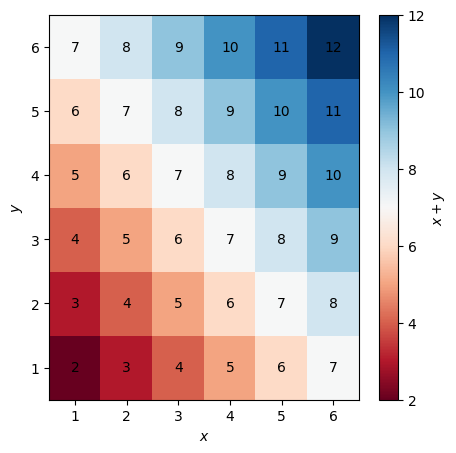

In [1]:
import matplotlib.pyplot as plt
import numpy as np
max_dice = 6
y, x = np.mgrid[1:max_dice+1, 1:max_dice+1]
z = x + y
fig, ax = plt.subplots(figsize=(5, 5))
c = ax.pcolor(x, y, z, cmap='RdBu', vmin=2, vmax=12)
for i in range(max_dice):
    for j in range(max_dice):
        text = ax.text(x[i][j], y[i][j], '{:d}'.format(z[i][j]), ha="center", va="center", color="black")
bar = fig.colorbar(c, ax=ax)
plt.xlabel('$x$')
plt.ylabel('$y$')
bar.set_label('$x+y$')
fig.show()

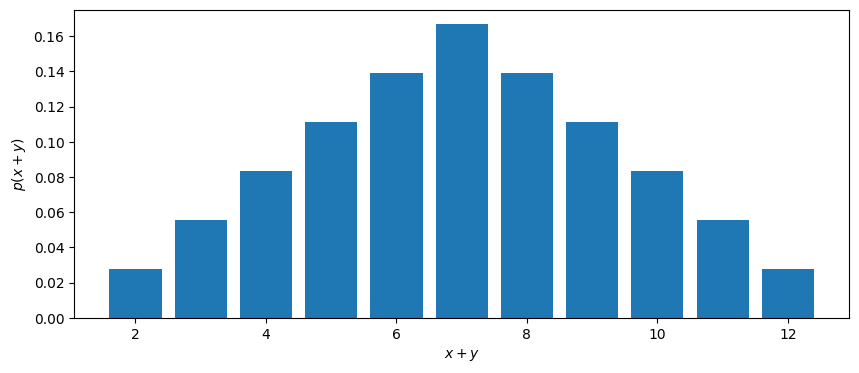

In [2]:
values = z.flatten()
count = np.bincount(values)[2:]
count = count / max_dice**2
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(np.arange(2, 13), count)
plt.xlabel('$x+y$')
plt.ylabel('$p(x+y)$')
fig.show()

## Somma di Poissoniane

Consideriamo la somma di due variabili poissoniane:

$n=n_1 + n_2$

dovre $n_1$ segue una distribuzione con *rate* atteso $\nu_1$ e $n_2$ con *rate* $\nu_2$.

La trasformazione è chiaramente: $n_1, n_2 \mapsto n = n_1 + n_2$.

Se $n_1$ e $n_2$ sono indipendenti, $P(n_1, n_2) = P(n_1; \nu_1) P(n_2; \nu_2)$

In questo caso, quindi, la distribuzione di $n$ è:

$\displaystyle P(n) = \sum_{n_1,\, n_2: n= n_1+n_2} \frac{e^{-\nu_1}\nu_1^{n_1}}{n_1!} \frac{e^{-\nu_2}\nu_2^{n_2}}{n_2!} = e^{-(\nu_1+\nu_2)} \sum_{n_1,\, n_2: n= n_1+n_2} \frac{\nu_1^{n_1}\nu_2^{n_2}}{n_1!n_2!} =
e^{-(\nu_1+\nu_2)} \sum_{n_1 = 0}^n \frac{\nu_1^{n_1}\nu_2^{n-n_1}}{n_1!(n-n_1)!} =$

$\displaystyle = \frac{e^{-(\nu_1+\nu_2)}}{n!} \sum_{n_1 = 0}^n \frac{n!}{n_1!(n-n_1)!}\nu_1^{n_1}\nu_2^{n-n_1} = \frac{e^{-(\nu_1+\nu_2)}(\nu_1+\nu_2)^n}{n!} 
$

La somma segue quindi una distribuzione di Poisson con *rate* $\nu_1+\nu_2$, che concorda con la conclusione intuitiva del problema.

## Combinazione di un processo Poissoniano ed uno binomiale

Si può considerare il caso della combinazione di una poissoniana con una binomiale:

* $n_0$ segue una distribuzione di Poisson con *rate* $\nu_0$
* $n$ segue una distribuzione bionmiale con paramtri $p$ e $n_0$.

La trasformazione è $n_0, n\mapsto n$ col vincolo $n \le n_0$.

La distribuzione di $n$ è quindi:

$\displaystyle P(n) = \sum_{n_0=n}^\infty \frac{e^{-\nu_0}\nu_0^{n_0}}{n_0!} \frac{n_0!}{n!(n_0-n)!}p^{n}(1-p)^{n_0-n} =
\frac{e^{- p \nu_0}(p \nu_0)^n}{n!} \sum_{n_0=n}^\infty \frac{e^{-(1-p)\nu_0}[\nu_0 (1-p)]^{n_0-n}}{(n_0-n)!} =
$

$\displaystyle = \frac{e^{- p \nu_0}(p \nu_0)^n}{n!} \sum_{k=0}^\infty \frac{e^{-(1-p)\nu_0}[(1-p)\nu_0]^k}{k!} = \frac{e^{- p \nu_0}(p \nu_0)^n}{n!}  $

La somma segue quindi una poissoniana con rate $\nu = p \nu_0$, seguendo la conclusione intuitiva del problema.

## Somma di binomiali

Consideriamo la somma di due variabili binomiali:

$n=n_1 + n_2$

dovre $n_1$ segue una distribuzione con paramtri $p$ e $N_1$ mentre $N_2$ segue una distributione con parametri $p$ e $N_2$.

La trasformazione si scrive, definendo $N=N_1+N_2$, come:

$\displaystyle P(n) = \sum_{n_1,\, n_2: n= n_1+n_2} \frac{N_1!}{n_1!(N_1-n_1)!}  \frac{N_2!}{n_2!(N_2-n_2)!}
p^{n_1}(1-p)^{N_1-n_1}\,p^{n_2}(1-p)^{N_2-n_2} =$

$\displaystyle  = \sum_{n_1,\, n_2: n= n_1+n_2} \frac{N_1!}{n_1!(N_1-n_1)!}  \frac{N_2!}{n_2!(N_2-n_2)!}
p^{n_1+n_1}(1-p)^{N_1+N_1-(n_1+n_2)} = $

$\displaystyle = p^n(1-p)^{N-n}\sum_{n_1=0}^n\frac{N_1!N_2!}{n_1!(N_1-n_1)!(n-n_1)!(N_2-n-n_1)!} =  p^n(1-p)^{N-n}\displaystyle\frac{N!}{n!{N-n!}}$

L'ultimo passaggio usa una proprietà notevole dei coefficienti binomiali che non è banale da dimostrare.

## Caso continuo

Consideriamo una funzione $\varphi: x\in X \mapsto y=\varphi(x)\in Y$. Possiamo generalizzare il calcolo della distribuzione di probabilità di $y$ in analogia col caso continuo:

$\displaystyle f_y(y) = \frac{\mathrm{d}P(y)}{\mathrm{d}y} = \int_{-\infty}^{+\infty}\!\!\! \delta(y - \varphi(x))\,f_x(x)\,\mathrm{d}x$

Dove 

$\displaystyle f_x(x) = \frac{\mathrm{d}P(x)}{\mathrm{d}x}$

e $\delta(y - \varphi(x))$ è la delta di Dirac.

## Funzione monotona crescente

Nel caso monodimensionale, se $\varphi$ è una funzione monotona crescente, c'è un solo valore $x$ per il quale $y=\varphi(x)$.

Possiamo effettuare la trasformazione di variabile $x\mapsto \varphi(x)$ nell'integrazione in $\mathrm{d}x$. Bisogna tenere conto che:

$$ \mathrm{d}x = \frac{\mathrm{d}x}{\mathrm{d}\varphi}\,\mathrm{d}\varphi = \left(\frac{\mathrm{d}\varphi}{\mathrm{d}x}\right)^{-1}\mathrm{d}\varphi$$

Si può quindi dimostrare che le espressioni ottenute sopra quindi:

$\displaystyle
f_y(y) = \int_{-\infty}^{+\infty}\!\!\! \delta(y - \varphi(x))\,f_x(x)\,\mathrm{d}x = 
\int_{-\infty}^{+\infty}\!\!\! \delta(y - \varphi)\,\frac{\mathrm{d}P(x)}{\mathrm{d}x}\,\frac{\mathrm{d}x}{\mathrm{d}\varphi}\,\mathrm{d}\varphi = 
\int_{-\infty}^{+\infty}\!\!\! \delta(y - \varphi)\,\frac{\mathrm{d}P(\varphi)}{\mathrm{d}\varphi}\,\mathrm{d}\varphi = \frac{\mathrm{d}P(y)}{\mathrm{d}y}
$

## Funzione monotona decrescente

Analogamente si può dimostrare, se $\varphi$ è monotona decrescente, che:

$\displaystyle f_y(y) = - f_x(\eta(y))\,\eta^\prime(y)$

dove $\eta^\prime$ però questao volta è negativa. Quidni $-\eta^\prime(y) = |\eta^\prime(y)|$.

In generale, per una funzione monotona che sia crescente o decrescente:

$\displaystyle f_y(y) = f_x(\eta(y))\,|\eta^\prime(y)|$

O anche:

$\displaystyle \frac{\mathrm{d}P(y)}{\mathrm{d}y} = \frac{\mathrm{d}P(x)}{\mathrm{d}x}\,\left|\frac{\mathrm{d}x}{\mathrm{d}y}\right|$

## Più in generale ...
Una proprietà della delta che si può dimostrare con integrazione a tratti dove la funzione $\varphi$ è monotona, è la seguente:
$\displaystyle\delta(\varphi(x))= \sum_{i=1}^n\frac{\delta(x-x_i)}{|\varphi^\prime(x_i)|}$
dove gli $x_i$ sono gli zeri di $\varphi(x)$.


Nel caso della trasformazione osservata sopra abbiamo:
$\displaystyle\delta(y-\varphi(x))= \sum_{i=1}^n\frac{\delta(x-x_i)}{|\varphi^\prime(x_i)|}$
dove gli $x_i$ sono le soluzioni dell'equazione di $y=\varphi(x)$.


La trasformazione da integrale a somma discreta dimostra l'analogia col caso continuo.

Si può trovare un altro modo di trasformare $f_x$ in $f_y$ passando per le distribuzioni cumulative. In particolare, dato un valore ${x}^\star$, la condizione $x <{x}^\star$ equivale a $y < {y}^\star$ dove $y=\varphi(x)$ e ${y}^\star=\varphi({x}^\star)$. Questo è vero se $\varphi$ è una funzione monotona crescente.

Saranno quindi uguali le probabilità corrispondenti, che definiscono le funzioni cumulative:

$F_y({y}^\star) = P(y < {y}^\star) = P(x < {x}^\star) = F_x({x}^\star)$

<span style="color: green;">Nota sulla notazione: qui sarebbe stato più agevole utilizzare la notazione degli statistici che usano la maiuscola per la variabile casuale, evitando il simbolo ~ per i valori osservati delle variabili casuali. Tuttavia, le espressioni in questo modo risultano ostiche, per qualche ragione, per i fisici.</span>

Passando alle definizioni di $F_y({y}^\star)$ e $F_x({x}^\star)$ come integrali delle corrispondenti PDF:

$\displaystyle\int_{-\infty}^{{y}^\star}\!\!\! f_y(y)\,\mathrm{d}y = 
\int_{-\infty}^{{x}^\star}\!\!\! f_x(x)\,\mathrm{d}x =
\int_{-\infty}^{\eta({y}^\star)}\!\!\!\!\!\! f_x(x)\,\mathrm{d}x
$

Dove $\eta$ è la funzione inversa di $\varphi$: $\eta({y}^\star)=\varphi^{-1}({y}^\star)$

Derivando rispetto a ${y}^\star$:

$\displaystyle\frac{\mathrm{d}}{\mathrm{d}{y}^\star}\int_{-\infty}^{{y}^\star}\!\!\! f_y(y)\,\mathrm{d}y =
f_y({y}^\star) = 
\frac{\mathrm{d}}{\mathrm{d}{y}^\star}\int_{-\infty}^{\eta({y}^\star)}\!\!\! f_x(x)\,\mathrm{d}x =
f_x(\eta({y}^\star))\,\eta^\prime({y}^\star)
$

Quindi, semplificando la notazione eliminando il simbolo $^\star$:

$\displaystyle f_y(y) = f_x(\eta(y))\,\eta^\prime(y)$

Questo non corrisponde a nient'altro che:

$\displaystyle \frac{\mathrm{d}P}{\mathrm{d}y} = \frac{\mathrm{d}P}{\mathrm{d}x}\,\frac{\mathrm{d}x}{\mathrm{d}y}$

<span style="color: blue">Un po' più formalmente, abbiamo dimostrato quello che avevamo già usato in precedenza.</span>

## Esempio a una dimensione

* **Trovare analiticamente la distribuzione di probabilità di $\sqrt{x}$ dove $x$ è distribuita uniformemente tra 0 e 1.**

Se definiamo $y=\sqrt{x}$, abbiamo:

$\displaystyle\frac{\mathrm{d}P}{\mathrm{d}y} = \frac{\mathrm{d}P}{\mathrm{d}x} \frac{\mathrm{d}x}{\mathrm{d}y}.$

Abbiamo:
$\displaystyle \frac{\mathrm{d}P}{\mathrm{d}x} = 1$
e:
$\displaystyle \frac{\mathrm{d}y}{\mathrm{d}x} = \frac{1}{2\sqrt{x}}$, 
per cui:

$\displaystyle\frac{\mathrm{d}P}{\mathrm{d}y} = {2\sqrt{x}} = 2y$

con $0 < y \le 1$.


# La distribuzione lognormale

Se $y$ segue una distribuzione normale con media $\mu$ e deviazione standard $\sigma$, la variabile $x=e^y$ segue una distribuzione che è detta **lognormale**.

Applicando quando detto sopra, si può dimostrare che la distribuzione di $x$ è:

$\displaystyle f(x;\mu,\sigma) = \frac{1}{x\sqrt{2\pi} \sigma} \exp\left(-\frac{(\log x-\mu)^2}{2\sigma^2}\right)$

$x$ deve essere maggiore di zero, essendo l'esponenziale di un valore reale.

Una proprietà interessante di $f(x)$ è che il valore atteso di $x$ vale:

$\displaystyle\mathbb{E}[x] = \exp\left({\mu+\frac{\sigma^2}{2}}\right)$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm

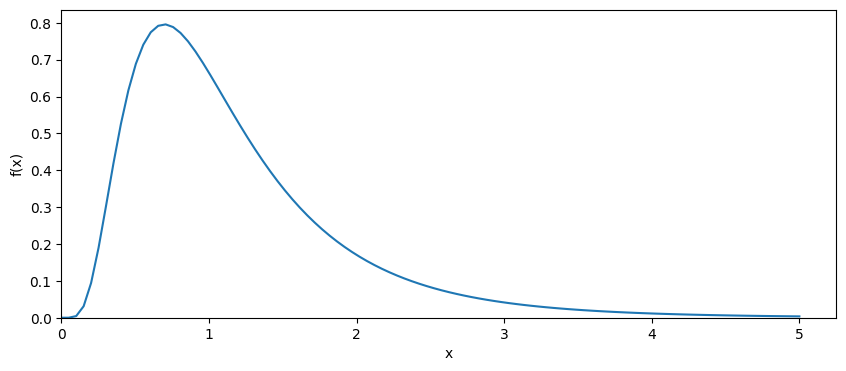

In [4]:
plt.figure(figsize=(10, 4))
x = np.linspace(0, 5, 100)
sigma=0.6
y = lognorm.pdf(x, sigma)
plt.plot(x,y)
plt.ylim(0)
plt.xlim(0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Distribuzione di probabilità della funzione cumulativa

La distribuzione di probabilità della funzione cumulativa $F(x)$ di una PDF $f(x)$ risulterà particolarmente utile in diverse applicazioni.

Possiamo scrivere, definendo $y=F(x)$:

$\displaystyle \frac{\mathrm{d}P(y)}{\mathrm{d}y} = \frac{\mathrm{d}P(x)}{\mathrm{d}x}\, \frac{\mathrm{d}x}{\mathrm{d}y} = f(x) \frac{\mathrm{d}x}{\mathrm{d}F(x)} = \frac{f(x)}{f(x)} = 1$

Quindi la funzione cumulativa è **uniformemente distribuita tra 0 e 1**, qualsiasi sia la distribuzione $f$.

## Da due ad una variabile
A due dimensioni, considerando $\varphi: (x,y)\in X\times Y \mapsto z=\varphi(x,y)\in Z$:

$\displaystyle f_z(z) = \frac{\mathrm{d}P(z)}{\mathrm{d}z} = \int\delta(z - \varphi(x,y))\,f_{xy}(x,y)\,\mathrm{d}x\mathrm{d}y$

## Distribuzioni marginali

Le distribuzioni marginali si ottengono come caso particolare del cambio di coordinate: $\varphi_x: (x,y)\mapsto u = x$ e $\varphi_y: (x,y)\mapsto v = y$. Infatti:

$\displaystyle f_x(u) = \int \delta(x - u)\, f(x,y)\,\mathrm{d}x\,\mathrm{d}y = \int f(u,y)\,\mathrm{d}y$

Che è la definizione di PDF marginale, sostituendo $u$ con $x$.

Nel caso discreto, la delta di Dirac viene sostituita dalla delta di Kroneker:

$\displaystyle P_x(u) = \sum_{x,\,y} \delta_{xu}\, P(x,y) = \sum_{y} P(u,y)$

## Valore atteso in più variabili

Come nel caso unidimensionale, il valore atteso è definito come segue:

$\displaystyle \mathbb{E}[\varphi(x,y)] = \int \varphi(x,y)f(x,y)\,\mathrm{d}x\,\mathrm{d}y$

Con più di due variabili l'estensione è ovvia.

## Valore atteso della somma

Con queste regole, possiamo dimostrare che il valore atteso della somma di due variabili è la somma dei valori attesi:

$\displaystyle \mathbb{E}[x+y] = \int (x+y)f(x,y)\,\mathrm{d}x\,\mathrm{d}y =
\int xf(x,y)\,\mathrm{d}x\,\mathrm{d}y + \int yf(x,y)\,\mathrm{d}x\,\mathrm{d}y = $
$\displaystyle= \int x\,\mathrm{d}x \int f(x,y)\,\mathrm{d}y + \int y\,\mathrm{d}y \int f(x,y)\,\mathrm{d}x
= \int x f_x(x)\,\mathrm{d}x + \int y f_y(y)\,\mathrm{d}y = \mathbb{E}[x]+\mathbb{E}[y]
$

Similmente si dimostra che, se $x$ e $y$ sono indipendenti ($f(x,y)=f_x(x)f_y(y)$):

$\displaystyle \mathbb{V}\mathrm{ar}[x+y] = \mathbb{V}\mathrm{ar}[x]+\mathbb{V}\mathrm{ar}[y]$

## Trasformazione tra più variabili

Usiamo qui come esempio la trasformazione da due variabili $(u, v)$ a due variabili $(x,y)$, ma il risultato è generalizzabile ad un numero arbitrario di variabili.

Assumiamo che la trasformazione sia: $\varphi: (u,v)\mapsto(x,y)$ e la sua inversa $\eta: (x,y)\mapsto(u,v)$.

La densità di probabilità nelle variabili $(u,v)$ è:

$\displaystyle f_{uv}(u, v) = \frac{\mathrm{d}P(u,v)}{\mathrm{d}u\,\mathrm{d}v}$

Mentra la trasformata sarà:

$\displaystyle f_{xy}(x, y) = \frac{\mathrm{d}P(x,y)}{\mathrm{d}x\,\mathrm{d}y}$

Il passaggio da $f_{uv}(u, v)$ a $f_{xy}(x, y)$ dipenderà da come si trasforma l'elemento di volume $\mathrm{d}u\,\mathrm{d}v$ in $\mathrm{d}x\,\mathrm{d}y$, e questo conterrà il **determinante jacobiano** della trasformazione:


$\displaystyle\mathrm{d}x\,\mathrm{d}y = \left|\frac{\partial(x,y)}{\partial(u,v)}\right|\,\mathrm{d}u\,\mathrm{d}v$

Dove:

$\displaystyle\frac{\partial(x,y)}{\partial(u,v)} =
\mathrm{det}\left|\begin{array}{cc}\frac{\displaystyle\partial x}{\displaystyle\partial u}&\frac{\displaystyle\partial x}{\displaystyle\partial v}\\\frac{\displaystyle\partial y}{\displaystyle\partial u}&\frac{\displaystyle\partial y}{\displaystyle\partial v}\end{array}\right|$

In realtà, anche per il caso multidimensionale si può scrivere la trasformazione usando le delta di Dirac, e si può dimostrare che si otterrà lo stesso risultato:

$\displaystyle f_{xy}(x,y) = \int \delta(x-\varphi_x(u,v))\,\delta(y-\varphi_y(u,v))\,f_{uv}(u, v)\,\mathrm{d}u\,\mathrm{d}v$

Sopra abbiamo usato la notazione: $\varphi: (u,v)\mapsto(x,y)=(\varphi_x(u,v), \varphi_y(u,v))$.

# Somma di due variabili casuali

La trasformazione che considero è $z = x + y$

$\displaystyle f_z(z) = \iint \delta(z - x - y) f_{xy}(x, y)\,\mathrm{d}x\mathrm{d}y = \int f_{xy}(x, z - x)\,\mathrm{d}x$

In particolare se $x$ e $y$ sono indipendenti:

$\displaystyle f_{x+y}(z = x+y) = \int f_{x}(x) f_{y}(z - x)\,\mathrm{d}x$

Questa operazione si chiama *concoluzione*.

## Esempio: somma di due variabili casuali
* **Trovare la distribuzione di probabilità di $x+y$ dove $x$ e $y$ sono indipendenti e distribuite uniformemente tra -1 e 1.**

Innanzitutto, le distribuzioni per $x$ e $y$ sono:

$\displaystyle\frac{\mathrm{d}P}{\mathrm{d}x} = \frac{1}{2}\left\{\begin{array}{rl} 
1 &\ \mathrm{per}\quad -1<x\le 1 \\ 0 &\ \mathrm{per}\quad -1\ge x\,\mathrm{o}\, x > 1
\end{array}\right.$

$\displaystyle\frac{\mathrm{d}P}{\mathrm{d}y} = \frac{1}{2}\left\{\begin{array}{rl} 
1 &\ \mathrm{per}\quad -1<y\le 1 \\ 0 &\ \mathrm{per}\quad -1\ge y,\mathrm{o}\,y > 1
\end{array}\right.$

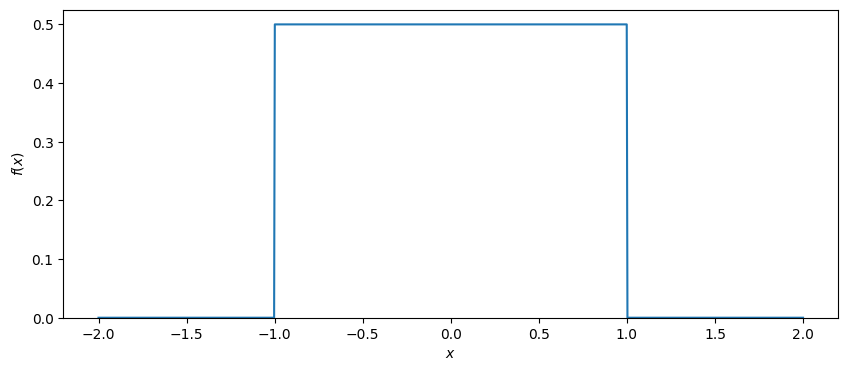

In [5]:
def pdf_flat(x): return 0.5 if (x>-1 and x<1) else 0.0
plt.figure(figsize=(10, 4))
x = np.linspace(-2, 2, 1000)
y = np.vectorize(pdf_flat)(x)
plt.plot(x,y)
plt.ylim(0)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

La PDF congiunta per $x$ e $y$ è il prodotto delle due:

$\displaystyle\frac{\mathrm{d}P}{\mathrm{d}x\mathrm{d}y} = \frac{1}{4}\left\{\begin{array}{rl} 
1 &\ \mathrm{per}\quad -1<x\le 1\,\mathrm{e}\,-1<y\le 1 \\ 0 &\ \mathrm{per}\quad -1\ge x,\, x > 1\,-1\ge y,\,\mathrm{o}\, y > 1
\end{array}\right.$

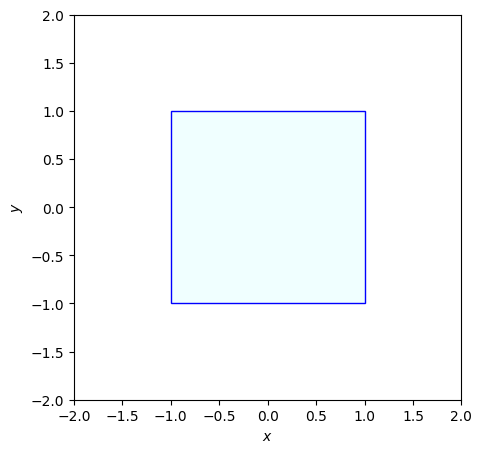

In [6]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(5, 5))
rect = patches.Rectangle((-1, -1), 2, 2, linewidth=1, edgecolor='b', facecolor='azure')
ax.add_patch(rect)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Per una distribuzione generica, possiamo calcolare la PDF della funzione tasformata: $\phi(x, y) = x + y$ secondo la regola:

$\displaystyle f_{z=x+y}(z) = \iint \delta(z - x - y)\, f(x,y)\,\mathrm{d}x\,\mathrm{d}y = \int f(x,z - x)\,\mathrm{d}x$

In particolare, se $x$ e $y$ sono indipendenti: $f(x, y) = f_x(x) f_y(y)$:

$\displaystyle f_{z=x+y}(z) = \int f_x(x)f_y(z - x)\,\mathrm{d}x$

Questa combinazione delle funzioni $f_x$ e $f_y$ si chiama *convoluzione*.


### Trasformazione in due variabili
Possiamo trasformare le variabili $x$ e $y$ in $u=x+y$, $v=x-y$. La trasformazione non conserva l'area, per cui:

$\displaystyle \mathrm{d}u\,\mathrm{d} v = \left|\frac{\partial(u, v)}{\partial x\partial y}\right|\mathrm{d}x\,\mathrm{d}\mathrm{y} = 2 \mathrm{d}x\,\mathrm{d}\mathrm{y} $

Nello spazio $(u,\,v)$ l'insieme in cui la PDF è non nulla si trasforma da un quadrato di lato $2$ con lati paralleli agli assi ad un quadrato con lati $2\sqrt{2}$ paralleli alle diagonali. La normalizzazione impone che, dove non è nulla, la PDF valga $1/8$, pari all'inverso dell'area del quadrato di lati $2\sqrt{2}$.

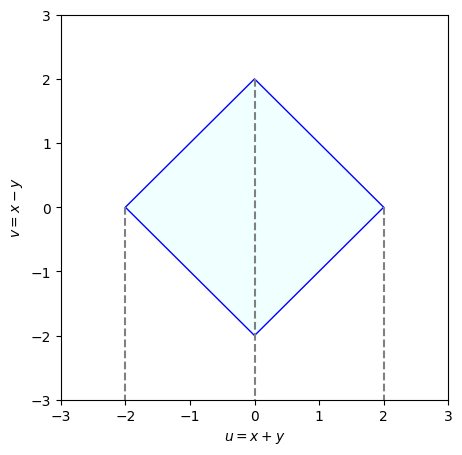

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
rect = patches.Polygon(((-2, 0), (0, 2), (2, 0), (0, -2)), closed=True,  linewidth=1, edgecolor='b', facecolor='azure')
ax.add_patch(rect)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot((-2, -2), (0, -3), c='gray', linestyle='--')
plt.plot((0, 0), (2, -3), c='gray', linestyle='--')
plt.plot((+2, +2), (0, -3), c='gray', linestyle='--')
plt.xlabel('$u=x+y$')
plt.ylabel('$v=x-y$')
plt.show()

La distribuzione di probabilità in $u=x+y$ è la distribuzione marginale:
$\displaystyle f_u(u) = \int_{-\infty}^{+\infty}\!\!\!\! f(u,\,v)\,\mathrm{d}v = \frac{1}{8}\int_{v_1(u)}^{v_2(u)}\!\!\!\!\mathrm{d}v = \frac{v_2(u) - v_1(u)}{8} = \frac{v_2(u)}{4}$

dove:

$\displaystyle v_2(u) = - v_1(u) = \left\{\begin{array}{rl}
2 + u & \ \mathrm{per}\quad -2<u\le 0 \\
2 - u & \ \mathrm{per}\quad 0 <u\le 2 \\
0 & \ \mathrm{per}\quad -2 \ge u \,\mathrm{o}\, u> 2
\end{array}\right. $

La distribuzione è quindi triangolare, simmetrica intorno a $0$, per $-2 < u \le 2$.

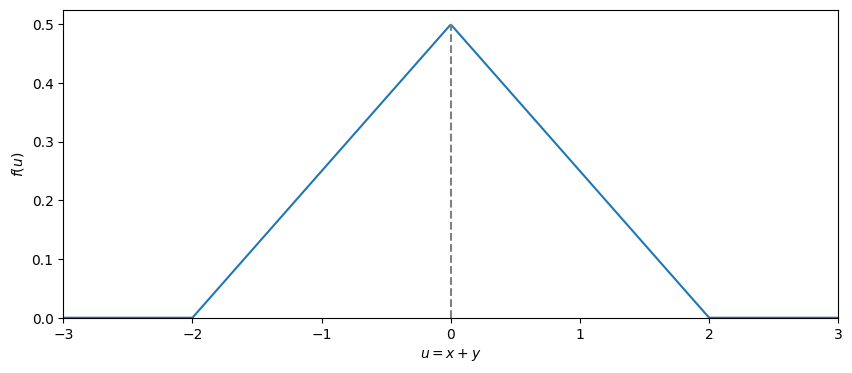

In [8]:
xrange = (-3, 3)
def pdf(u):
    if u < -2 or u > +2: return 0.0
    if u < 0 and u > -2: return (2 + u)/4
    if u > 0 and u < +2: return (2 - u)/4
fig, ax = plt.subplots(figsize=(10, 4))
xs = np.linspace(*xrange, 1000)
ys = np.vectorize(pdf)(xs)
plt.plot(xs, ys)
plt.plot((0, 0), (0, 0.5), c='gray', linestyle='--')
plt.ylim(0)
plt.xlim(*xrange)
plt.xlabel('$u=x+y$')
plt.ylabel('$f(u)$')
plt.show()

* **Dimostrazione alternativa:**

$\displaystyle f(u) = \int_{-\infty}^{+\infty} \mathrm{d}x\int_{-\infty}^{+\infty}\mathrm{d}y\, \delta(u - x - y)f(x,y) = $

$\displaystyle = \frac{1}{4}\int_{-1}^{+1} \mathrm{d}x\int_{-1}^{+1}\mathrm{d}y\, \delta(u - x - y) =
\frac{1}{4}\int_{-1}^{+1} \mathrm{d}x\left\{\begin{array}{ll} 1\ \ \text{se}\ \ -1<u-x<+1\\ 0 \ \ \text{altrimenti} \end{array}\right. =
\frac{1}{4}\int_{-1}^{+1} \mathrm{d}x\left\{\begin{array}{ll} 1\ \ \text{se}\ \ u-1<x<u+1\\ 0 \ \ \text{altrimenti} \end{array}\right.\ .
$

L'integrale è parei alla lunghezza dell'intersezione tra gli intevalli $[-1, +1]$ e $[u-1 ,u+1]$, che vale $1/2$ per $u=0$, e scende linearmente a zero per $u=+2$ e $u=-2$, che corrisponde al risultato scritto sopra.

Questo integrale è un esempio di *convoluzione*, definita sopra come:

$\displaystyle f(u) = \int_{-\infty}^{+\infty}f(x)g(u-x)\,\mathrm{d}x$

## Somma di due variabili distribuite uniformemente in due intervalli
* **calcolare la distribuzione di probabilità di $u = x+y$ dove $x$ è distribuito uniformemente tra $x_0-\delta_x$ e $x_0+\delta_x$ e $y$ è distribuito uniformemente tra $y_0-\delta_y$ e $y_0+\delta_y$. Per semplicità si prenda $x_0>0$, $y_0>0$, $x_0>\delta_x$ e $y_0>\delta_y$.**

Questo calcolo, sarà chiaro in seguito, rappresenta la distribuzione di probabilità, in senso Bayesiano, di $u=x+y$ in caso $x$ e $y$ siano determinati con 
errore massimo rispettivamente pari a $\delta_x$ d $\delta_y$.

La distribuzione di $u$ è, considerando che $f(x,y) = 1/\delta_x\delta_y$ per $x_0-\delta_x<x<x_0+\delta_x$, $y_0-\delta_y<y<y_0+\delta_y$:

$\displaystyle f(u) = \int_{x_0-\delta_x}^{x_0+\delta_x} \mathrm{d}x\int_{y_0-\delta_y}^{y_0+\delta_y}\mathrm{d}y\, \delta(u - x - y) f(x, y) = $

$\displaystyle = \frac{1}{\delta_x\delta_y}
\int_{x_0-\delta_x}^{x_0+\delta_x} \mathrm{d}x\left\{\begin{array}{ll} 1\ \ \text{se}\ \ y_0-\delta_y < u - x < y_0 + \delta_y \ \ \text{ovvero se}\ \ u - y_0-\delta_y < x < u - y_0 + \delta_y\\ 0 \ \ \text{altrimenti} \end{array}\right.\ .$

L'integrale è pari alla lunghezza dell'intersezione tra gli intevalli $[x_0 - \delta_x, x_0+\delta_x]$ e $[u- y_0-\delta_y, u - y_0 + \delta_y]$.

Definiamo:

* $u - y_0 -\delta_y = x_1$
* $u - y_0 + \delta_y = x_2$

Le possibilità sono le seguenti:

* I due intervalli sono disgiunti se: $x_2 = u - y_0 + \delta_y < x_0-\delta_x$, ossia se $u<x_0 + y_0 - \delta_x - \delta_y$, o se $x_1 = u - y_0 - \delta_y > x_0+\delta_x$, ossia
se $u> x_0 + y_0+\delta_x + \delta_y$, abbiamo $f(u) = 0$.

* L'intervallo $[x_1, x_2]$ è contenuto in $[x_0-\delta_x, x_0+\delta_x]$ se $x_1 = u-y_0-\delta_y > x_0-\delta_x$ e $x_2 = u - y_0 + \delta_y < x_0+\delta_x$ ossia se $x_0 + y_0 -\delta_x + \delta_y < u< x_0 + y_0 +\delta_x - \delta_y$. Abbiamo $f(u) = (x_2 - x_1)/\delta_x\delta_y = 2\delta_y/\delta_x\delta_y = 2/\delta_x$. Questa condizione è possibile solo se $x_0 + y_0 -\delta_x + \delta_y < x_0 + y_0 +\delta_x - \delta_y$, ossia se $\delta_y < \delta_x$.

* L'intervallo $[x_0-\delta_x, x_0+\delta_x$ è contenuto in $[x_1, x_2]$ se abbiamo $x_1 = u - y_0-\delta_y <x_0-\delta_x$ e $x_2 = u - y_0 + \delta_y> x_0+\delta_x$, ossia se $x_0+y_0+\delta_x-\delta_y< u<x_0+y_0-\delta_x+\delta_y$.
Abbiamo $f(u)=2\delta_x/\delta_x\delta_y=2/\delta_y$. Questa condizione è possibile solo se $\delta_x<\delta_y$, opposta al precedente caso.

* Gli intervalli si intersecano con $x_1$ fuori da $[x_0-\delta_x, x_0+\delta_x]$ se $x_1=u-y_0-\delta_y<x_0-\delta_x$ e $x_0-\delta_x<x_2 = u-y_0+\delta_y<x_0+\delta_x$, abbiamo $f(u) = (x_2 - (x_0-\delta_x))/\delta_x\delta_y = (u-x_0-y_0+\delta_x+\delta_y)/\delta_x\delta_y$. Questo corrisponde a $x_0+y_0-\delta_x-\delta_y<u<\min(x_0+y_0 -\delta_x+\delta_y, x_0+y_0+\delta_x-\delta_y)$.

* Gli intervalli si intersecano con $x_2$ fuori da $[x_0-\delta_x, x_0+\delta_x]$ se $x_0-\delta_x < x_1 = u-y_0-\delta_y< x_0 + \delta_x$ e $x_2 = u - y_0+\delta_y> x_0 + \delta_x$ abbiamo $f(u) = (x_0+\delta_x - x_1)/\delta_x\delta_y = (x_0+y_0 +\delta_x + \delta_y - u)/\delta_x\delta_y$. Questo corrisponde a 
$\max(x_0+y_0+\delta_x-\delta_y, x_0+y_0-\delta_x+\delta_y)<u<x_0+y_0+\delta_x+\delta_y$.

La distribuzione è una funzione continua lineare a tratti, con cinque regioni, di cui:
* Due regioni estreme dove $f(u)=0$, esterne all'intervallo $[x_0+y_0-\delta_x-\delta_y, x_0+y_0+\delta_x+\delta_y]$.
* Una regione centrale dove $f(u)$ è costante, pari al valore massimo della funzione, che è pari a $2/\max(\delta_x, \delta_y)$. Questa regione si estende all'intervallo: $[x_0+y_0-|\delta_x-\delta_y|, x_0+y_0+|\delta_x-\delta_y|]$ che può degenerare in un punto se $\delta_x=\delta_y$. 
* Due regioni in cui $f(u)$ dipende linearmente da $u$ e varia tra zero e il valore massimo definito sopra.

Anche se concettualmente semplice, il calcolo è un po' laborioso a causa della discontinuità della funzione. Se vogliamo calcolare la distribuzione di, ad esempio, $f(u=xy)$, la funzione diventa sia discontinua che non lineare.

Vedremo che in questi casi i metodi Monte Carlo possono aiutare a semplificare il calcolo.

Un approfondimento si può trovare in questo video:
* [Convolutions | Why X+Y in probability is a beautiful mess](https://youtu.be/IaSGqQa5O-M?si=X7pNcZn2y4uff098)

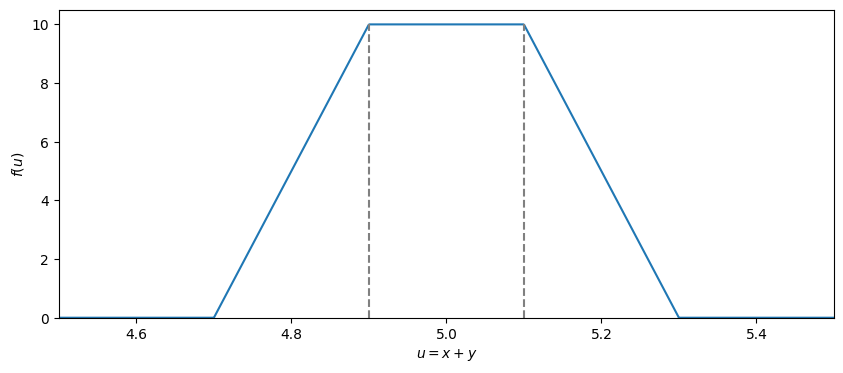

In [9]:
x0, y0 = 2.0, 3.0
dx, dy = 0.1, 0.2
xrange = (4.5, 5.5)
s = x0 + y0
dxy = dx + dy
dd = abs(dx - dy)
dmax = max(dx, dy)
def pdf(u):
    if u < s - dxy or u > s + dxy: return 0.0
    if u < s + dd and u > s - dd: return 2.0/dmax
    if u < s - dd: return (u - s + dxy)/(dx*dy)
    if u > s - dd: return (s + dxy - u)/(dx*dy)
fig, ax = plt.subplots(figsize=(10, 4))
xs = np.linspace(*xrange, 1000)
ys = np.vectorize(pdf)(xs)
plt.plot(xs, ys)
plt.plot((s - dd, s - dd), (0, 2.0/dmax), c='gray', linestyle='--')
plt.plot((s + dd, s + dd), (0, 2.0/dmax), c='gray', linestyle='--')
plt.ylim(0)
plt.xlim(*xrange)
plt.xlabel('$u=x+y$')
plt.ylabel('$f(u)$')
plt.show()

Proviamo a visualizzare intuitivamente cosa sta succedendo.

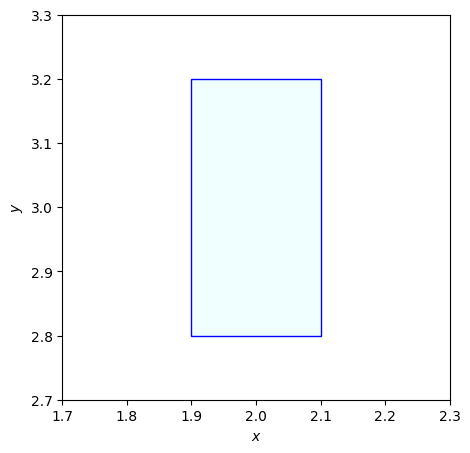

In [10]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(5, 5))
rect = patches.Rectangle((x0 - dx, y0 - dy), 2*dx, 2*dy, linewidth=1, edgecolor='b', facecolor='azure')
ax.add_patch(rect)
plt.xlim(1.7, 2.3)
plt.ylim(2.7, 3.3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

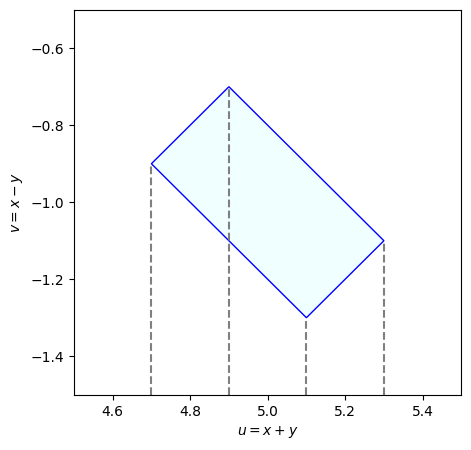

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
def pt(sx, sy):
    return [x0+sx*dx + y0+sy*dy, x0+sx*dx - (y0+sy*dy)]
rect = patches.Polygon((pt(-1, -1), pt(-1, +1), pt(+1, +1), pt(+1, -1)), closed=True,  linewidth=1, edgecolor='b', facecolor='azure')
ax.add_patch(rect)
x_lo, x_hi = 4.5, 5.5
y_lo, y_hi = -1.5, -0.5
def plt_pt(sx, sy):
    p = pt(sx, sy)
    plt.plot((p[0], p[0]), (y_lo, p[1]), c='gray', linestyle='--')
plt_pt(-1, -1)
plt_pt(-1, +1)
plt_pt(+1, +1)
plt_pt(+1, -1)
plt.xlim(x_lo, x_hi)
plt.ylim(y_lo, y_hi)
plt.xlabel('$u=x+y$')
plt.ylabel('$v=x-y$')
plt.show()

## Trasformazione di distribuzioni di campioni casuali

Se la distribuzione è determinata approssimativamente dalla generazione di un grande campione di numeri casuali, $(x_1,\cdots,x_n)$, la trasformazione di variabili si può gestire in maniera immediata.

Basterà applicare la trasformazione a tutti i valori per ottenere il campione trasformato: $(y_1,\cdots,y_n)= (\varphi(x_1),\cdots,\varphi(x_n))$. La distribuzione di questi valori trasformati approssimerà la PDF della variabile casuale $y=\varphi(x)$.

Se servirà si potrà poi applicare un algoritmo di *smoothing* alla distribuzione trasformata.

## Spunt per esercizi
* Trovare analiticamente la distribuzione di probabilità della variabile $x$ se le variabili $x$ e $y$ sono distribuite uniformemente all'interno del cercho con centro il $(0,\,0)$ e raggio $R$. 
* Trovare anche, per il caso precedente, le distribuzioni delle variabili $\rho=\sqrt{x^2+y^2}$ e $\phi=\arctan(y/x)$.